In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sn
from datetime import datetime
import matplotlib.pyplot as plt

In [14]:
sample = pd.read_csv('G_PSQL_data/JAN_sample_no_outliers.csv')

In [53]:
delayed = sample[sample['arr_delay'] > 0]
early = sample[sample['arr_delay'] < 0]

In [54]:
early = early.dropna()
delayed = delayed.dropna()

In [18]:
early = early.groupby('branded_code_share', as_index=False)['arr_delay'].mean()

In [19]:
delayed = delayed.groupby('branded_code_share', as_index=False)['arr_delay'].mean()

In [30]:
early.rename(columns={'arr_delay': 'ed'}, inplace=True)

In [32]:
both = early.merge(delayed)

In [34]:
both['avg'] = (both['arr_delay'] + both['ed']) / 2

In [51]:
both = both.groupby('branded_code_share', as_index=False).mean()

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

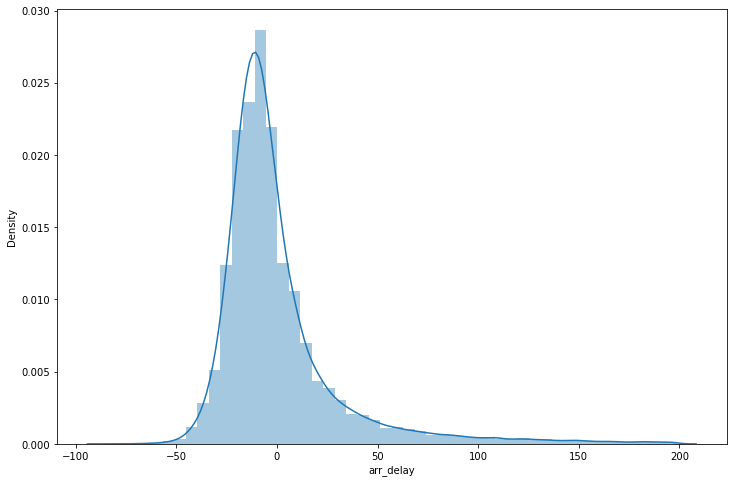

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]
sn.distplot(sample['arr_delay'])

In [94]:
blah = {code:sample[sample['branded_code_share'] == code].arr_delay for code in set(sample['branded_code_share'])}

In [99]:
st.f_oneway(blah['DL'], blah['AS'], blah['HA'], blah['WN'], blah['B6'], blah['G4'], blah['AA'], blah['UA'], blah['NK'], blah['VX'], blah['F9'])

F_onewayResult(statistic=75.84080953436685, pvalue=6.523278046273461e-156)

#### the arr time between branded code shares are not equal: good starting point for a feature maybe

In [101]:
len(set(sample['tail_num']))

5922

In [31]:
sample.nunique()

fl_date                  62
mkt_unique_carrier       11
branded_code_share       11
mkt_carrier              11
mkt_carrier_fl_num     6667
op_unique_carrier        28
tail_num               5922
op_carrier_fl_num      6669
origin_airport_id       360
origin                  360
origin_city_name        354
dest_airport_id         360
dest                    360
dest_city_name          354
crs_dep_time           1218
dep_time               1225
dep_delay               262
taxi_out                138
wheels_off             1330
wheels_on              1396
taxi_in                  94
crs_arr_time           1314
arr_time               1267
arr_delay               275
cancelled                 1
diverted                  1
crs_elapsed_time        471
actual_elapsed_time     514
air_time                498
distance               1468
dtype: int64

#### new session

In [3]:
sample = pd.read_csv('G_PSQL_data/jan_cleaned.csv')

<AxesSubplot:xlabel='dist_cats', ylabel='arr_delay'>

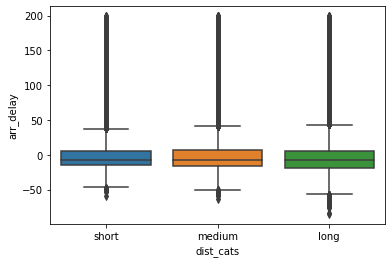

In [6]:
sn.boxplot(x=sample['dist_cats'], y=sample['arr_delay'])

In [8]:
short = sample[sample['dist_cats'] == 'short']['arr_delay']
med = sample[sample['dist_cats'] == 'medium']['arr_delay']
long = sample[sample['dist_cats'] == 'long']['arr_delay']

In [10]:
st.f_oneway(short, med, long)

F_onewayResult(statistic=105.82388462525579, pvalue=1.2190714691373319e-46)

#### mean arr delay is significantly diff between distance categorys

In [21]:
sample = sample[sample['crs_elapsed_time'] < 500]

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='crs_elapsed_time', ylabel='Density'>

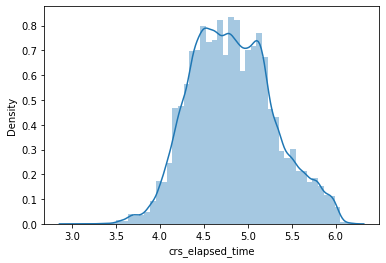

In [24]:
sn.distplot(sample['crs_elapsed_time'].apply(np.log))

<AxesSubplot:ylabel='arr_delay'>

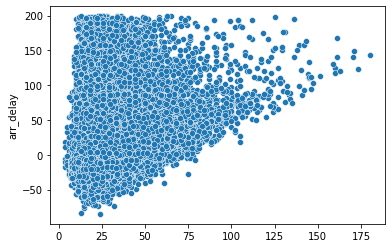

In [28]:
sn.scatterplot(x=(sample['taxi_in']+sample['taxi_out']), y=sample['arr_delay'])

In [34]:
taxiout = sample.groupby('origin_airport_id', as_index=False).agg({'taxi_out': 'mean'})

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='taxi_in', ylabel='Density'>

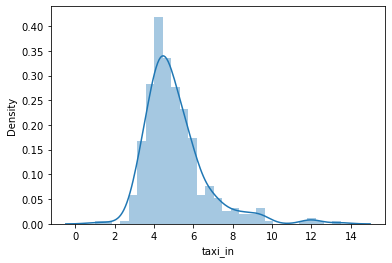

In [33]:
sn.distplot(taxiin['taxi_in'])

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='taxi_out', ylabel='Density'>

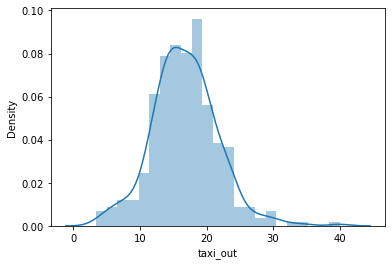

In [35]:
sn.distplot(taxiout['taxi_out'])

In [37]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
df = pd.read_csv('final_process.csv')

In [47]:
def scatter(x, y):
    return sn.scatterplot(x=df[x], y=df[y])

interact(scatter,
         x = df.columns.to_list(),
         y = df.columns.to_list())

interactive(children=(Dropdown(description='x', options=('mkt_unique_carrier', 'arr_delay', 'crs_elapsed_time'…

<function __main__.scatter(x, y)>

In [48]:
def hist(x):
    return sn.distplot(df[x])

interact(hist,
         x=df.dtypes[df.dtypes != 'object'].index
        )

interactive(children=(Dropdown(description='x', options=('arr_delay', 'crs_elapsed_time', 'dep_hour', 'arr_hou…

<function __main__.hist(x)>

In [50]:
logs = df[df.dtypes[df.dtypes != 'object'].index].apply(np.log)

In [54]:
df['speed'] = df['distance'] / df['actual_elapsed_time']
speed = df.groupby('tail_num', as_index=False).agg({'speed': 'mean'})
df.merge(speed, on='tail_num')

KeyError: 'distance'

interactive(children=(Dropdown(description='x', options=('arr_delay', 'crs_elapsed_time', 'dep_hour', 'arr_hou…

<function __main__.histlog(x)>

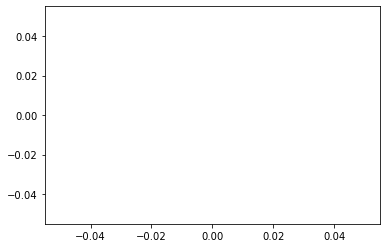

In [53]:
def histlog(x):
    return sn.distplot(logs[x])

interact(histlog,
         x=logs.columns
        )

<AxesSubplot:>

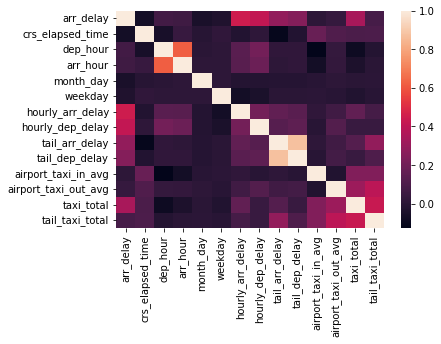

In [44]:
sn.heatmap(df.corr())